In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("Dataset_for_Prediction.xlsx")
data.head()

,Year,Area,Production,Yield,Predominantly reddish medium texture,Red desert soils,Sandy loam,Soil are lithosolsat foot hills & alluvials in plains,brown soils,clay loam,...,District_Ваran,District_Наnumangarh,District_Раli,Season_Kharif,Season_Rabi,Crop_Bajra,Crop_Barley,Crop_Jowar,Crop_Rapeseed &Mustard,Crop_Wheat
0,1997,56600,30400.0,0.537102,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1997,105900,34600.0,0.326723,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1997,24700,28900.0,1.170040,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1997,36700,25400.0,0.692098,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1997,79300,144500.0,1.822194,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [2]:
data.isnull().sum()

Year                                      0
Area                                      0
Production                                9
Yield                                    20
 Predominantly reddish medium texture     0
                                         ..
Crop_Bajra                                0
Crop_Barley                               0
Crop_Jowar                                0
Crop_Rapeseed &Mustard                    0
Crop_Wheat                                0
Length: 71, dtype: int64

In [3]:
data = data.dropna()

In [4]:
#all parameters
x = data.drop("Yield",axis=1)
y = data[["Yield"]]

cols = ['Yield',' Predominantly reddish medium texture', ' Red desert soils',
       ' Sandy loam', ' Soil are lithosolsat foot hills & alluvials in plains',
       ' brown soils', ' clay loam',
       ' coarse sand in texture some places calcareous',
       ' deep soils in valleys', ' eastern part alluvial', ' foot hills',
       ' groundwater salinity', ' high soluble salts & exchangeable sodium',
       ' loamycoarse in texture & calcareous',
       ' nature of recently alluvial calcareous has been observed',
       ' sallow depth red soils in depressions', ' shallow on hills',
       ' well drained calcareous', ' west north west lithosols',
       'Alluvial deposites calcareous', 'Alluvial prone to water logging',
       'Black of alluvial origin', 'Desert soils and sand dunes aeolian soil',
       'Predominantly reddish medium texture', 'Red desert soils',
       'Sandy loam', 'Sierozens',
       'Soil are lithosolsat foot hills & alluvials in plains',
       'Mean_Seasonal_Rainfall']

#selected parameters
x1 = data.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=71)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=71)

# RANDOM FOREST

In [5]:
#Using all parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred_all = model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2score: 0.9638436515081396
RMSE: 0.03564416484020771
MAE: 0.025122868659073126


In [7]:
#using selected parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y_train)
pred_selected = model.predict(x1_test)
from sklearn.metrics import r2_score
r = r2_score(y_test,pred_selected)
print("R2score: ",r)
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_selected)))
print('MAE:',mean_absolute_error(y_test, pred_selected))

C:\Users\Sanchit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2score:  0.9706683562457551
RMSE: 0.03210438555877871
MAE: 0.02171092742447838


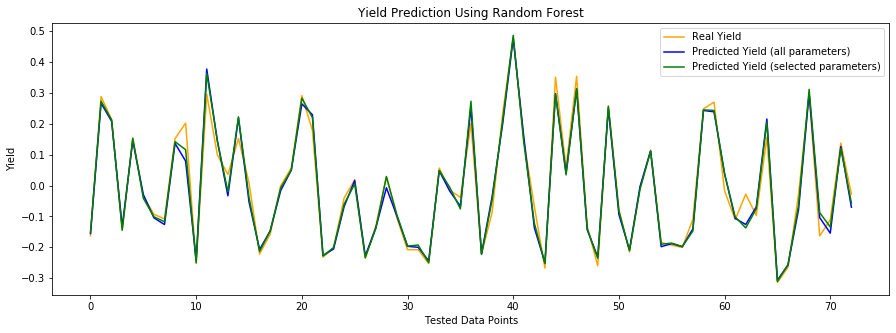

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_selected, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using Random Forest')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()

# SUPPORT VECTOR MACHINE 

In [9]:
#using all parameters
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Default hyperparameters
svr.fit(x_train,y_train)
pred_all=svr.predict(x_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.8982433161230687
RMSE: 0.059796757425198625
MAE: 0.047852253033345137


C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#using selected parameters
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Default hyperparameters
svr.fit(x1_train,y_train)
pred_sel = svr.predict(x1_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test,pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9033044480088029
RMSE: 0.0582907187068775
MAE: 0.04744273781182322


C:\Users\Sanchit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


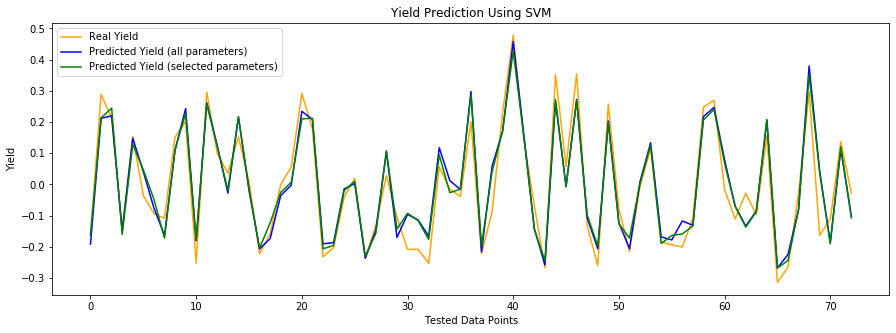

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_sel, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using SVM')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()

# LASSO REGRESSION

In [12]:
#using all parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_all= model_lasso.predict(x_test)

print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_all))) 
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.8146824212217434
RMSE: 0.08069645755381685
MAE: 0.0588093331954562


In [13]:
#using selected parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x1_train, y_train) 
pred_sel= model_lasso.predict(x1_test)

print('R2 score:',r2_score(y_test, pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_sel))) 
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.7929212370102475
RMSE: 0.08530292881366584
MAE: 0.06279053471454211


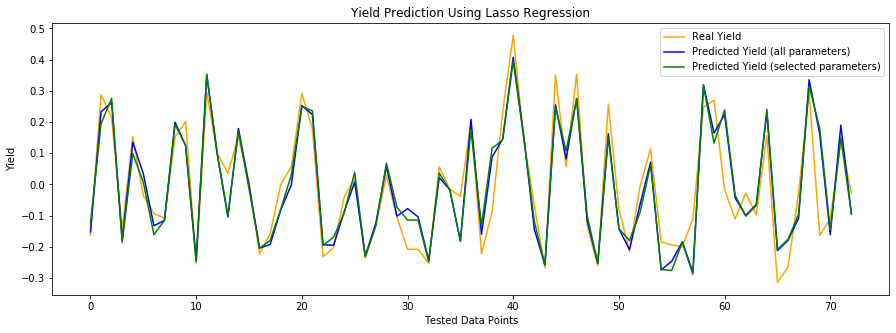

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_sel, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using Lasso Regression')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()